<a href="https://colab.research.google.com/github/hurairakhan135/COSC3P99/blob/main/COSC_3P99_Notebook_2_Bitcoin_Project_Huraira_Khan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NoteBook By: Huraira Khan #7517824

# COSC 3P99 Bitcoin Project

To learn about what goes on in this code please refer to Notebook 1, the code is the exact same but datasets are different

## Initial Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

#!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

!pip install torch_geometric

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

2.3.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 813.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00


## Initialize Dataset

In [ ]:
from torch_geometric.datasets import EllipticBitcoinDataset

dataset = EllipticBitcoinDataset("", None, None, False)
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: EllipticBitcoinDataset():
Number of graphs: 1
Number of features: 165
Number of classes: 2


Done!


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[203769, 165], edge_index=[2, 234355], y=[203769], train_mask=[203769], test_mask=[203769])
Number of nodes: 203769
Number of edges: 234355
Average node degree: 1.15
Number of training nodes: 29894
Training node label rate: 0.15
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## GCN 2 + relu

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 64) # First graph convolutional layer, takes input features of size of the data set and outputs 4 features per node
        self.conv2 = GCNConv(64, 32) # Second graph convolutional layer takes input features of size 4 and outputs 2 features per node
        self.classifier = Linear(32, dataset.num_classes) # creates a linear transformation that tkes in input features of size 2 and outputs of the size of the data classses

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index) # uses the edge index to know how to aggregate the features (x) from neighbouring nodes for each node.
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(165, 64)
  (conv2): GCNConv(64, 32)
  (classifier): Linear(in_features=32, out_features=2, bias=True)
)


## Training on the new BitcoinDataset Network

<IPython.core.display.Javascript object>

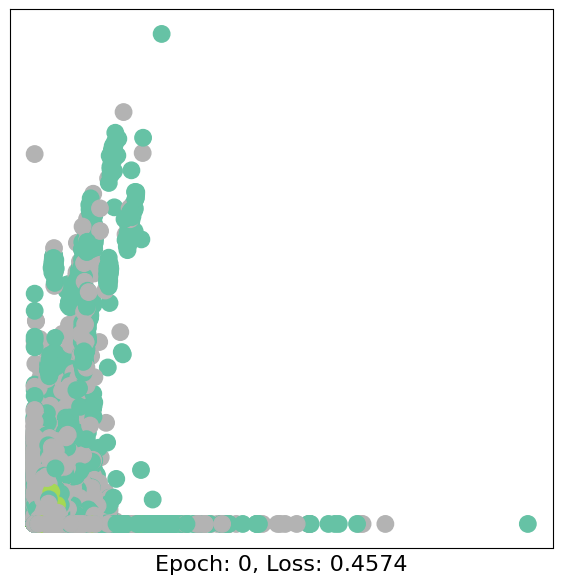

Epoch: 000, Loss: 0.4574, Train Licit Acc: 1.0000, Train Illicit Acc: 0.0000, Test Licit Acc: 0.9996, Test Illicit Acc: 0.0000


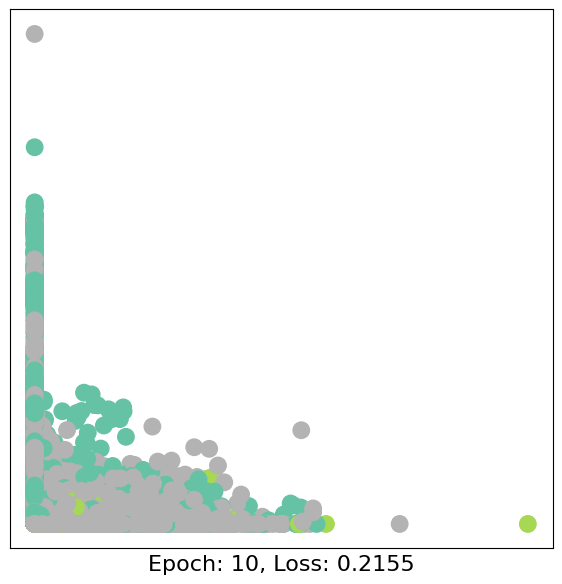

Epoch: 010, Loss: 0.2155, Train Licit Acc: 0.9879, Train Illicit Acc: 0.3460, Test Licit Acc: 0.9251, Test Illicit Acc: 0.2909


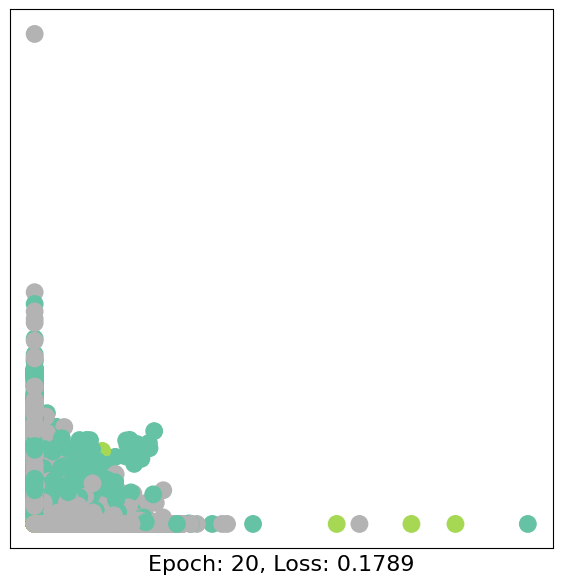

Epoch: 020, Loss: 0.1789, Train Licit Acc: 0.9784, Train Illicit Acc: 0.5867, Test Licit Acc: 0.9465, Test Illicit Acc: 0.2909


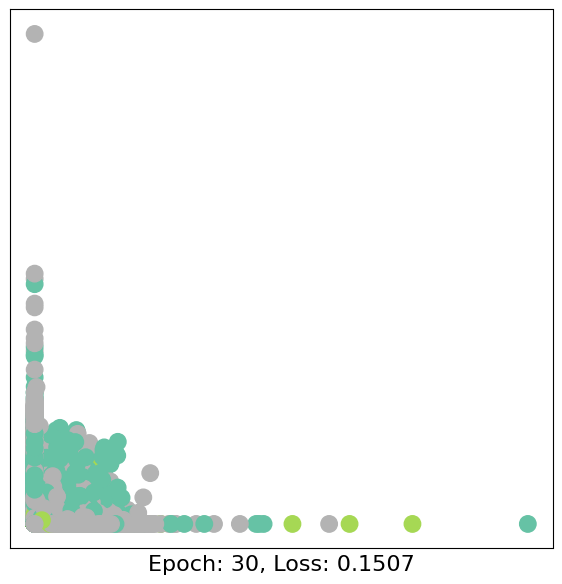

Epoch: 030, Loss: 0.1507, Train Licit Acc: 0.9766, Train Illicit Acc: 0.6860, Test Licit Acc: 0.9870, Test Illicit Acc: 0.2068


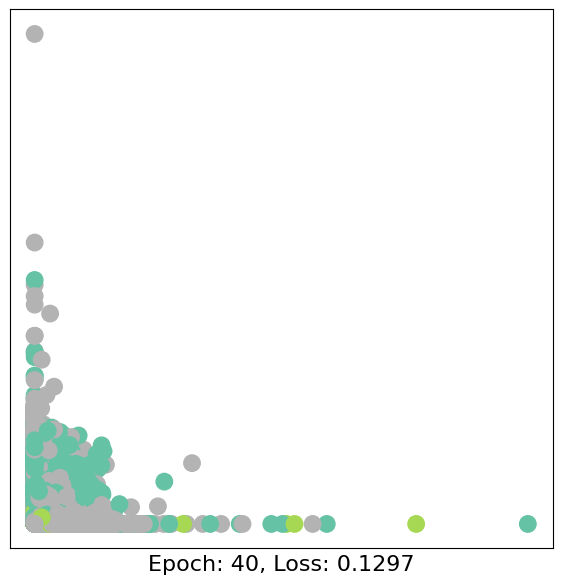

Epoch: 040, Loss: 0.1297, Train Licit Acc: 0.9812, Train Illicit Acc: 0.7293, Test Licit Acc: 0.9954, Test Illicit Acc: 0.1810


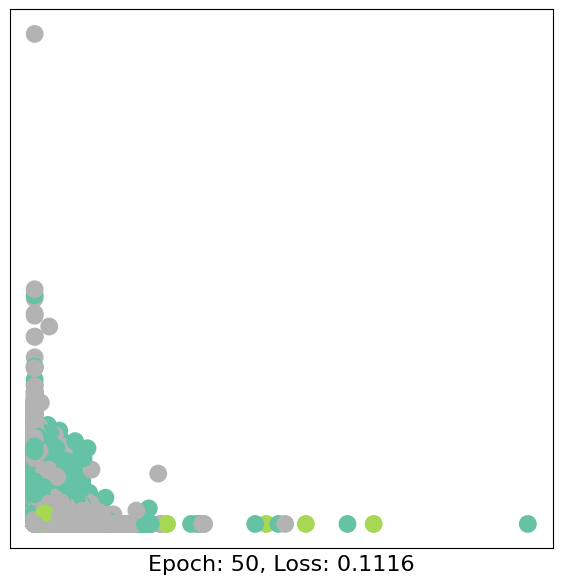

Epoch: 050, Loss: 0.1116, Train Licit Acc: 0.9857, Train Illicit Acc: 0.7657, Test Licit Acc: 0.9954, Test Illicit Acc: 0.1976


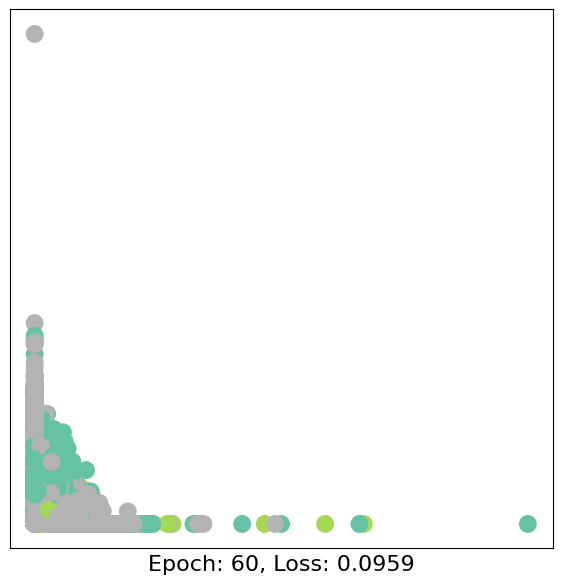

Epoch: 060, Loss: 0.0959, Train Licit Acc: 0.9888, Train Illicit Acc: 0.7943, Test Licit Acc: 0.9953, Test Illicit Acc: 0.2216


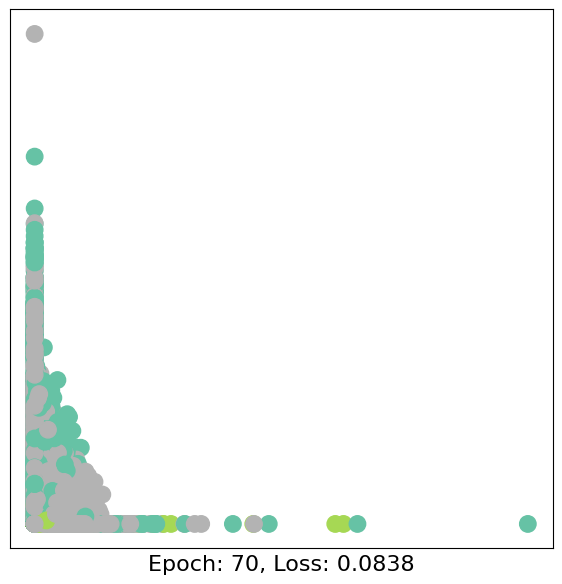

Epoch: 070, Loss: 0.0838, Train Licit Acc: 0.9878, Train Illicit Acc: 0.8414, Test Licit Acc: 0.9934, Test Illicit Acc: 0.2835


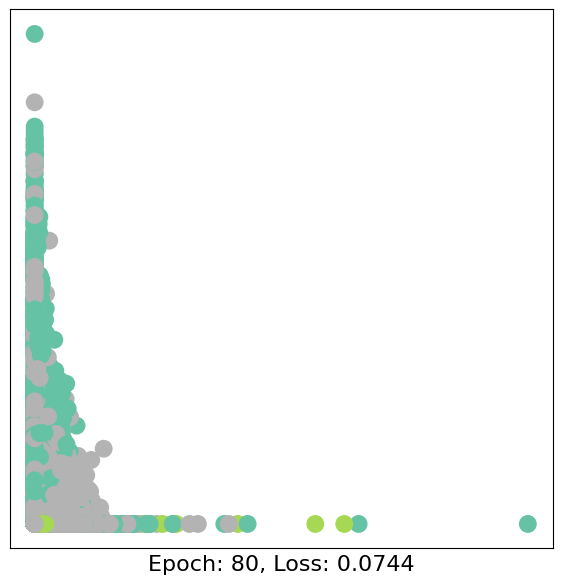

Epoch: 080, Loss: 0.0744, Train Licit Acc: 0.9883, Train Illicit Acc: 0.8593, Test Licit Acc: 0.9931, Test Illicit Acc: 0.3029


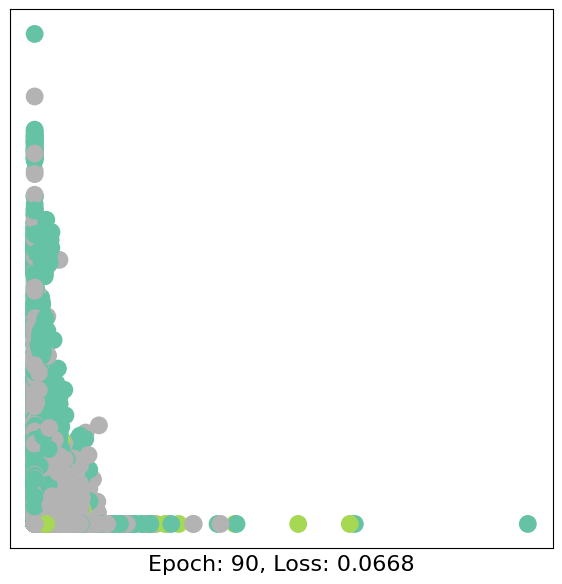

Epoch: 090, Loss: 0.0668, Train Licit Acc: 0.9898, Train Illicit Acc: 0.8744, Test Licit Acc: 0.9921, Test Illicit Acc: 0.2955


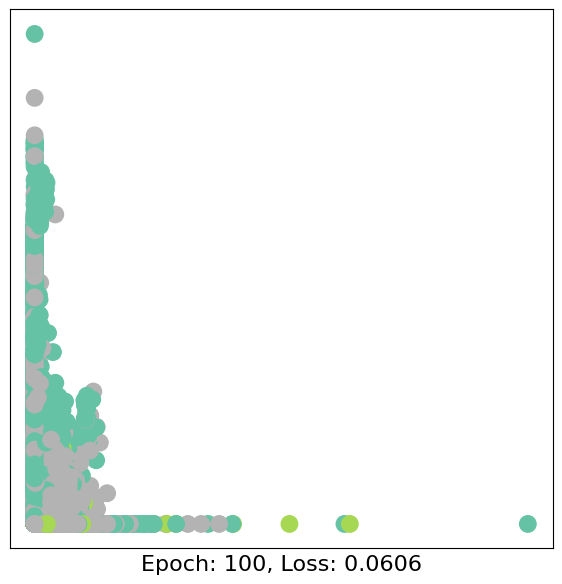

Epoch: 100, Loss: 0.0606, Train Licit Acc: 0.9935, Train Illicit Acc: 0.8648, Test Licit Acc: 0.9925, Test Illicit Acc: 0.2742


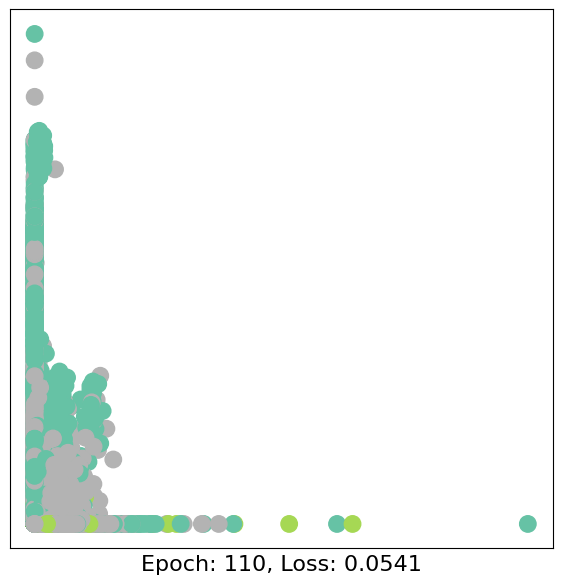

Epoch: 110, Loss: 0.0541, Train Licit Acc: 0.9947, Train Illicit Acc: 0.8666, Test Licit Acc: 0.9917, Test Illicit Acc: 0.2687


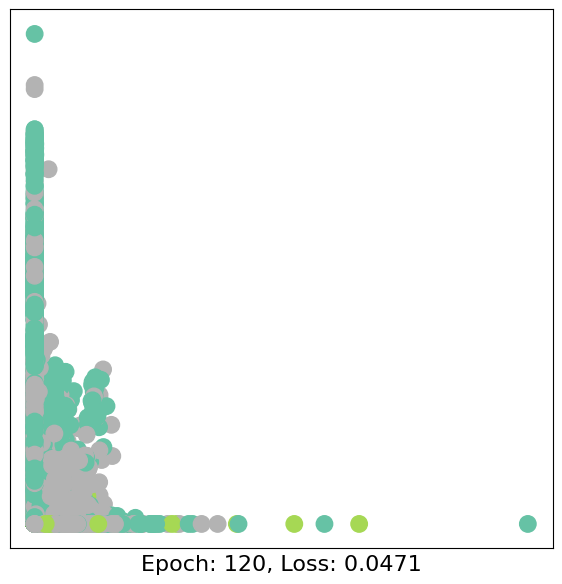

Epoch: 120, Loss: 0.0471, Train Licit Acc: 0.9950, Train Illicit Acc: 0.8873, Test Licit Acc: 0.9894, Test Illicit Acc: 0.2705


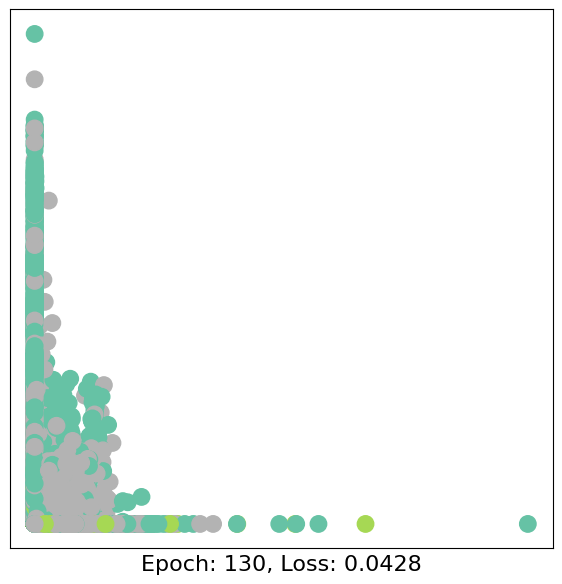

Epoch: 130, Loss: 0.0428, Train Licit Acc: 0.9950, Train Illicit Acc: 0.9073, Test Licit Acc: 0.9849, Test Illicit Acc: 0.2890


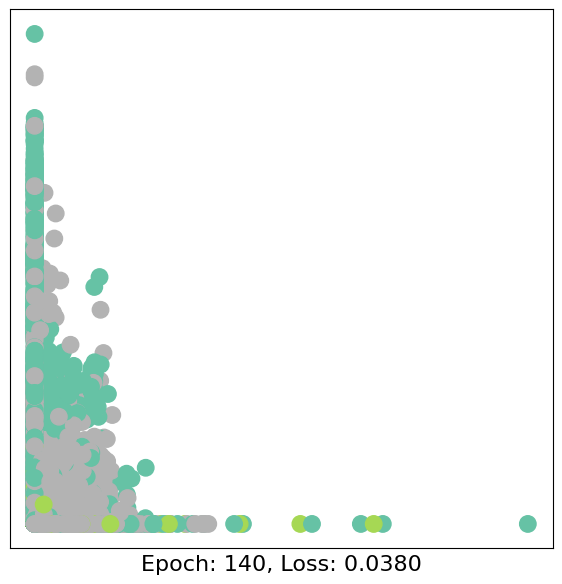

Epoch: 140, Loss: 0.0380, Train Licit Acc: 0.9954, Train Illicit Acc: 0.9200, Test Licit Acc: 0.9811, Test Illicit Acc: 0.3047


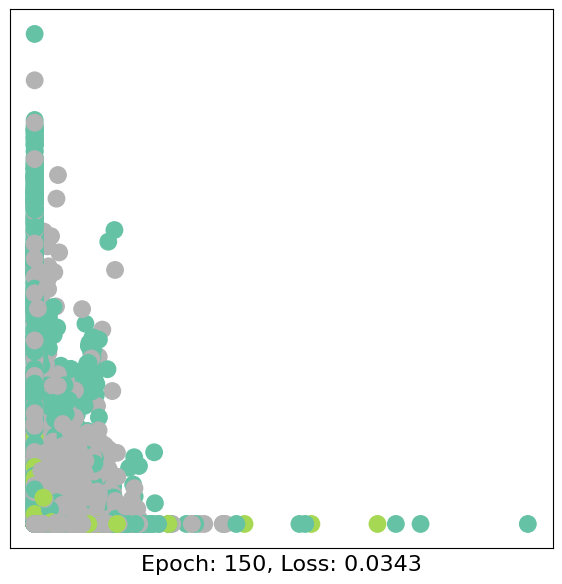

Epoch: 150, Loss: 0.0343, Train Licit Acc: 0.9948, Train Illicit Acc: 0.9463, Test Licit Acc: 0.9791, Test Illicit Acc: 0.3047


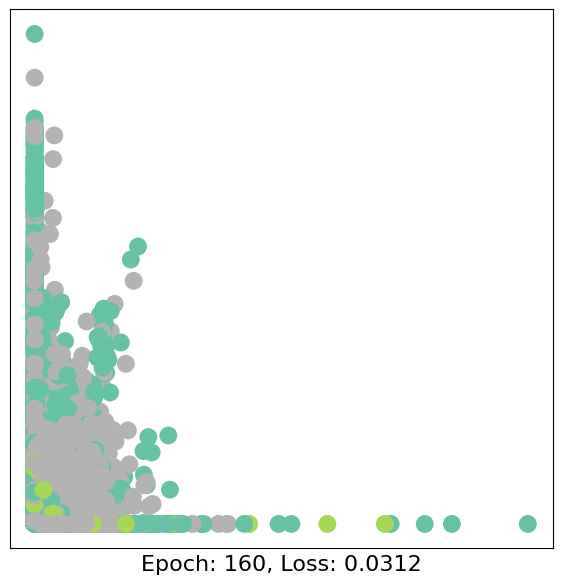

Epoch: 160, Loss: 0.0312, Train Licit Acc: 0.9959, Train Illicit Acc: 0.9448, Test Licit Acc: 0.9781, Test Illicit Acc: 0.2890


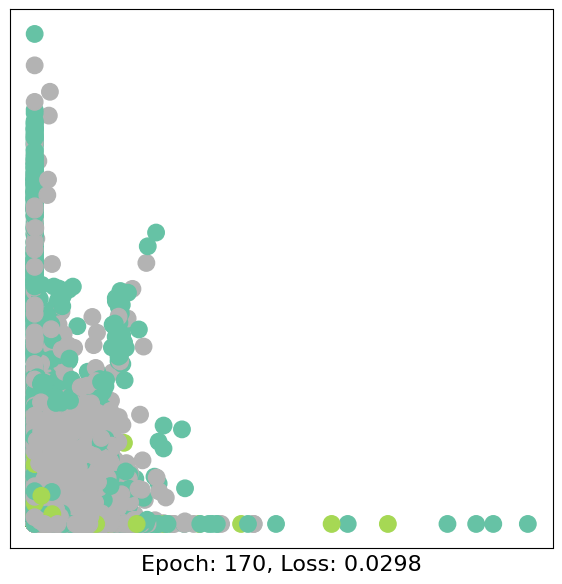

Epoch: 170, Loss: 0.0298, Train Licit Acc: 0.9948, Train Illicit Acc: 0.9656, Test Licit Acc: 0.9784, Test Illicit Acc: 0.3389


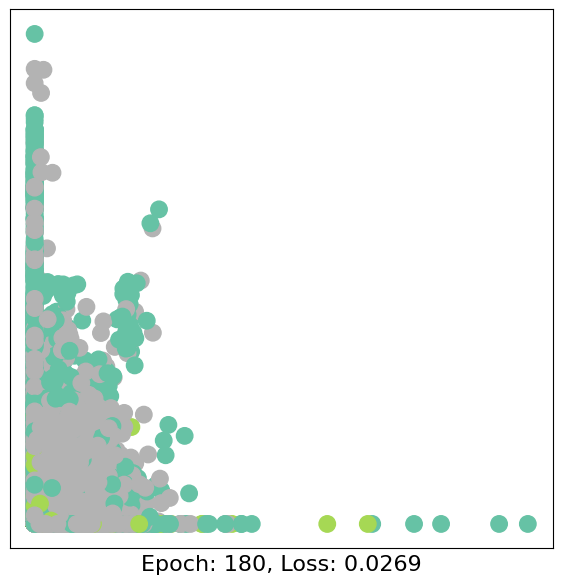

Epoch: 180, Loss: 0.0269, Train Licit Acc: 0.9935, Train Illicit Acc: 0.9766, Test Licit Acc: 0.9754, Test Illicit Acc: 0.3629


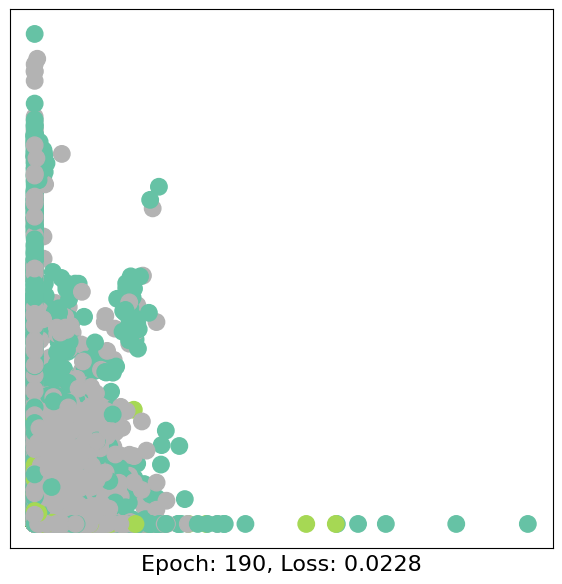

Epoch: 190, Loss: 0.0228, Train Licit Acc: 0.9948, Train Illicit Acc: 0.9798, Test Licit Acc: 0.9757, Test Illicit Acc: 0.3527


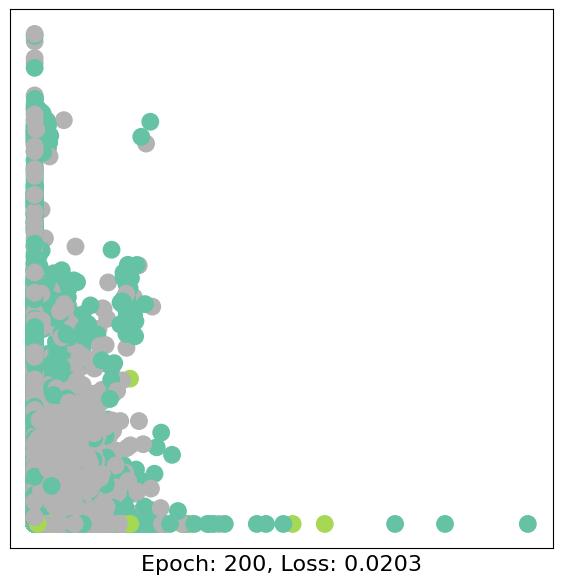

Epoch: 200, Loss: 0.0203, Train Licit Acc: 0.9972, Train Illicit Acc: 0.9752, Test Licit Acc: 0.9736, Test Illicit Acc: 0.3453


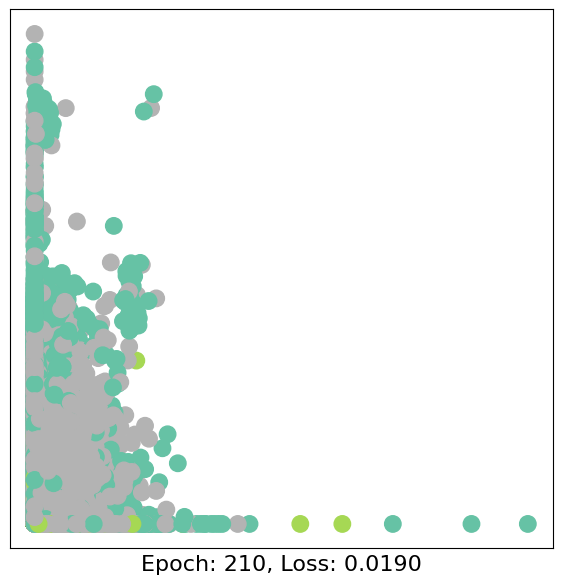

Epoch: 210, Loss: 0.0190, Train Licit Acc: 0.9982, Train Illicit Acc: 0.9656, Test Licit Acc: 0.9740, Test Illicit Acc: 0.3232


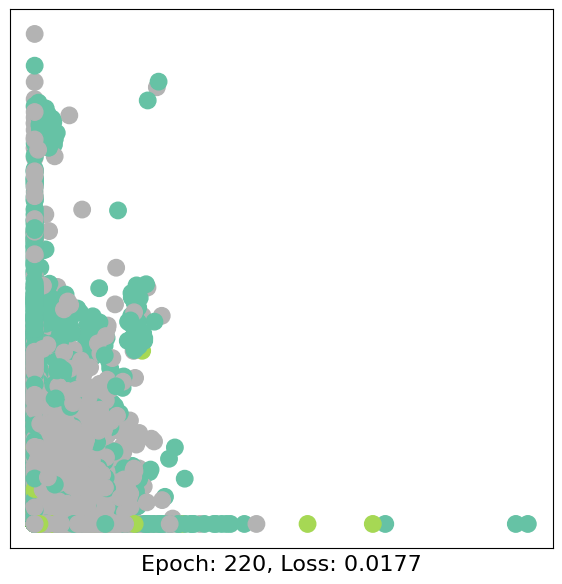

Epoch: 220, Loss: 0.0177, Train Licit Acc: 0.9974, Train Illicit Acc: 0.9824, Test Licit Acc: 0.9754, Test Illicit Acc: 0.3463


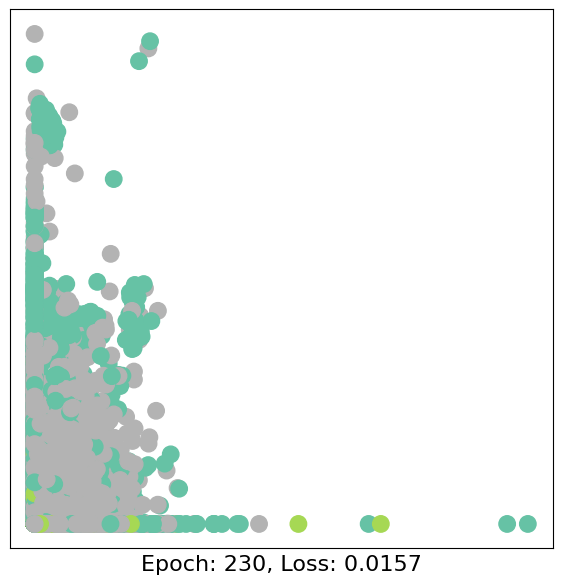

Epoch: 230, Loss: 0.0157, Train Licit Acc: 0.9968, Train Illicit Acc: 0.9890, Test Licit Acc: 0.9739, Test Illicit Acc: 0.3564


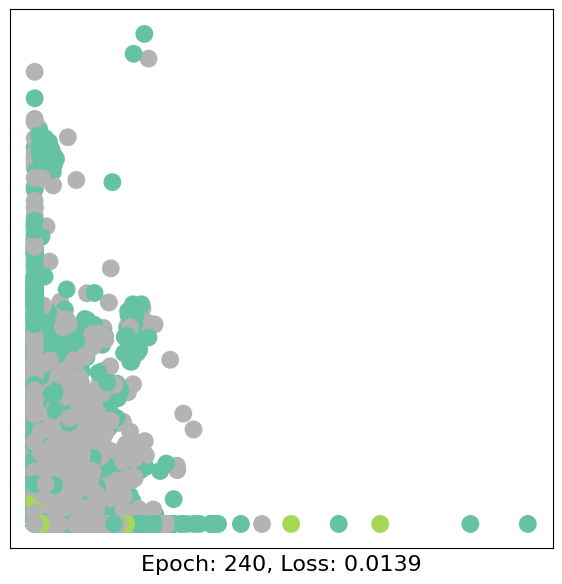

Epoch: 240, Loss: 0.0139, Train Licit Acc: 0.9984, Train Illicit Acc: 0.9830, Test Licit Acc: 0.9727, Test Illicit Acc: 0.3306


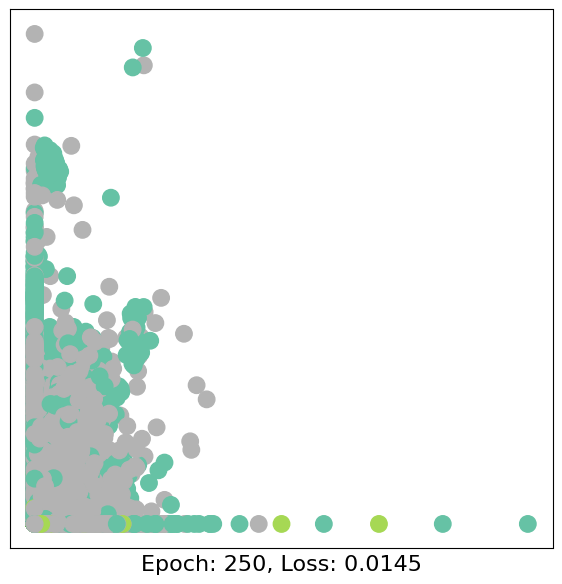

Epoch: 250, Loss: 0.0145, Train Licit Acc: 0.9949, Train Illicit Acc: 0.9942, Test Licit Acc: 0.9752, Test Illicit Acc: 0.3490


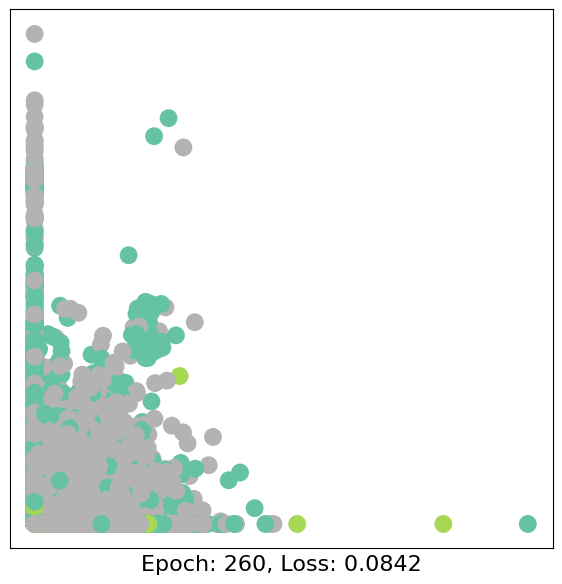

Epoch: 260, Loss: 0.0842, Train Licit Acc: 0.9797, Train Illicit Acc: 0.9648, Test Licit Acc: 0.9743, Test Illicit Acc: 0.3989


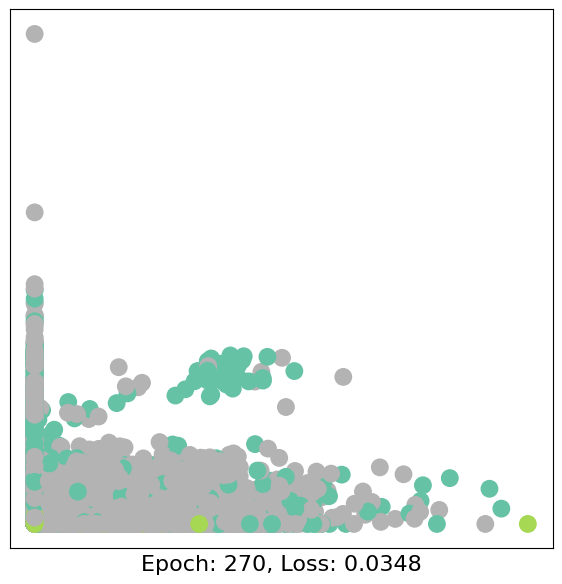

Epoch: 270, Loss: 0.0348, Train Licit Acc: 0.9925, Train Illicit Acc: 0.9480, Test Licit Acc: 0.9858, Test Illicit Acc: 0.2419


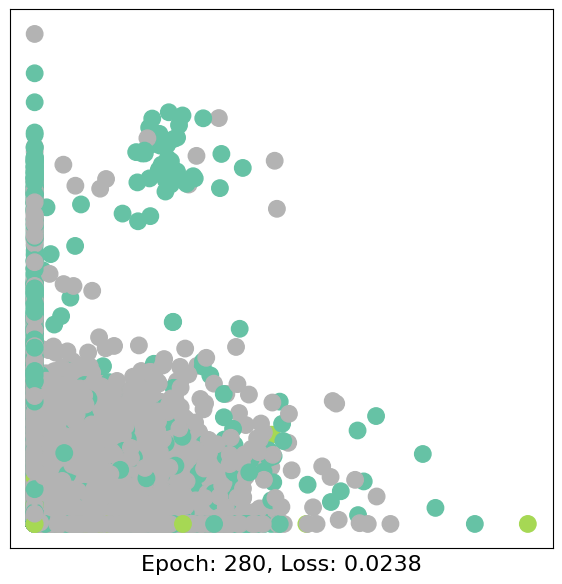

Epoch: 280, Loss: 0.0238, Train Licit Acc: 0.9978, Train Illicit Acc: 0.9425, Test Licit Acc: 0.9778, Test Illicit Acc: 0.2918


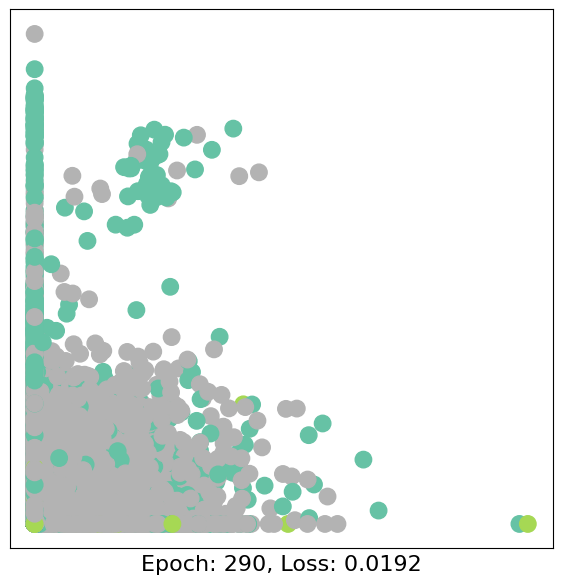

Epoch: 290, Loss: 0.0192, Train Licit Acc: 0.9963, Train Illicit Acc: 0.9798, Test Licit Acc: 0.9765, Test Illicit Acc: 0.3435


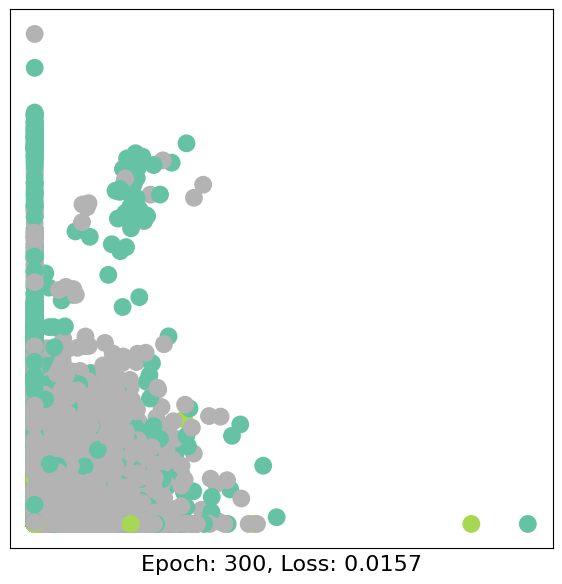

Epoch: 300, Loss: 0.0157, Train Licit Acc: 0.9981, Train Illicit Acc: 0.9818, Test Licit Acc: 0.9721, Test Illicit Acc: 0.3167


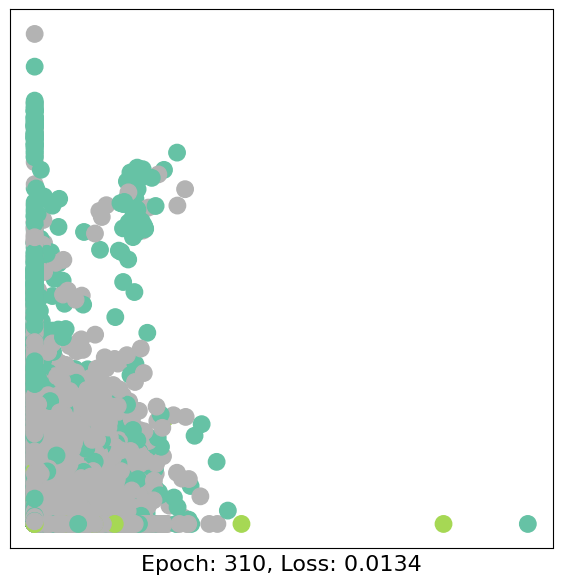

Epoch: 310, Loss: 0.0134, Train Licit Acc: 0.9986, Train Illicit Acc: 0.9832, Test Licit Acc: 0.9742, Test Illicit Acc: 0.3223


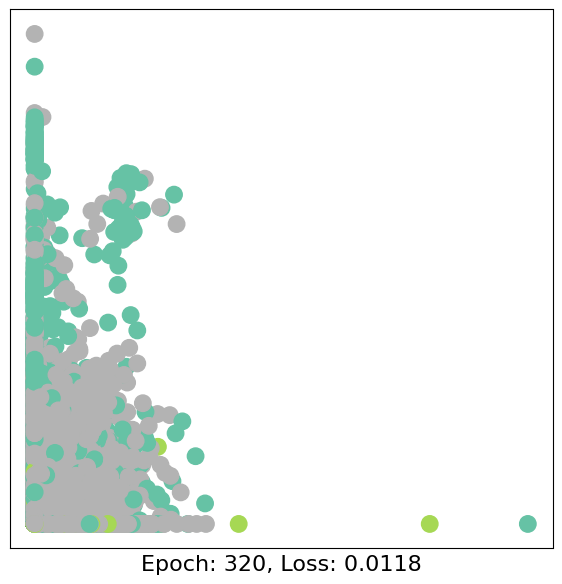

Epoch: 320, Loss: 0.0118, Train Licit Acc: 0.9988, Train Illicit Acc: 0.9882, Test Licit Acc: 0.9743, Test Illicit Acc: 0.3306


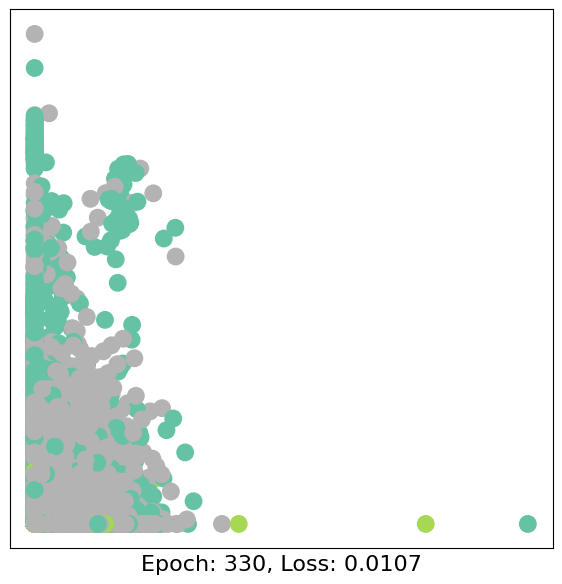

Epoch: 330, Loss: 0.0107, Train Licit Acc: 0.9989, Train Illicit Acc: 0.9899, Test Licit Acc: 0.9734, Test Illicit Acc: 0.3306


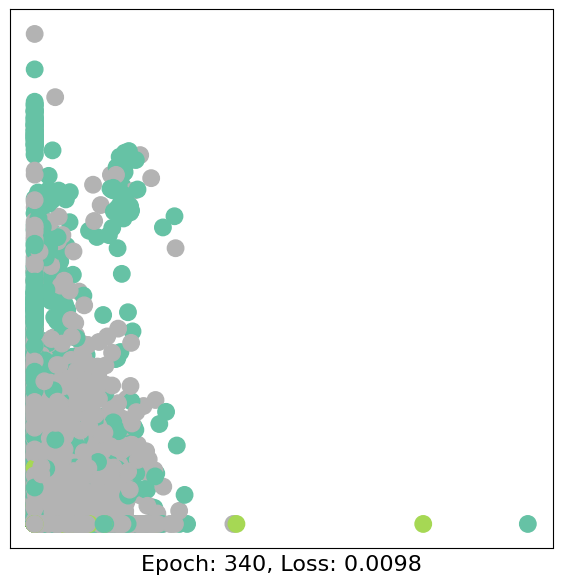

Epoch: 340, Loss: 0.0098, Train Licit Acc: 0.9989, Train Illicit Acc: 0.9922, Test Licit Acc: 0.9738, Test Illicit Acc: 0.3343


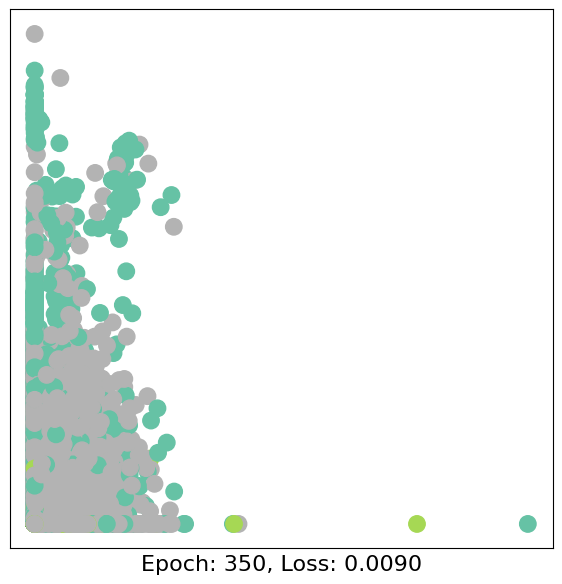

Epoch: 350, Loss: 0.0090, Train Licit Acc: 0.9989, Train Illicit Acc: 0.9939, Test Licit Acc: 0.9743, Test Illicit Acc: 0.3296


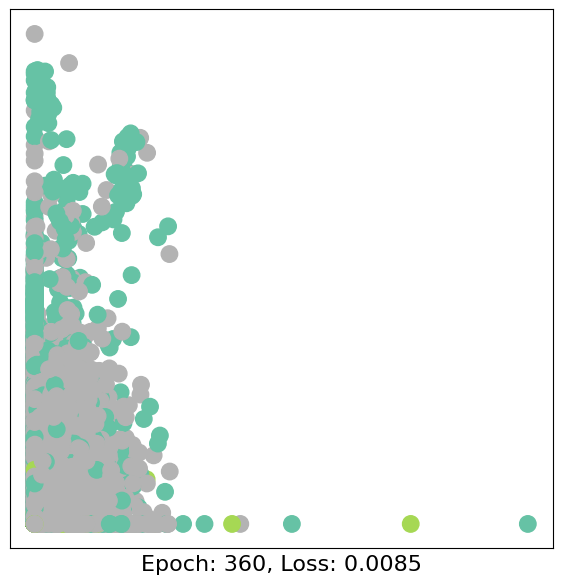

Epoch: 360, Loss: 0.0085, Train Licit Acc: 0.9991, Train Illicit Acc: 0.9934, Test Licit Acc: 0.9749, Test Illicit Acc: 0.3296


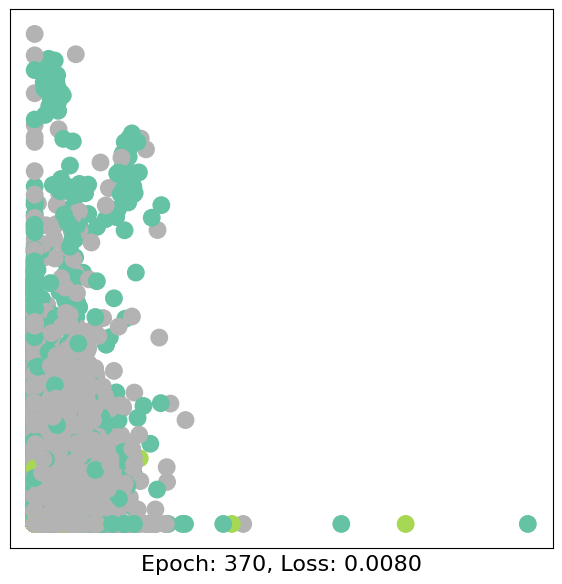

Epoch: 370, Loss: 0.0080, Train Licit Acc: 0.9991, Train Illicit Acc: 0.9945, Test Licit Acc: 0.9747, Test Illicit Acc: 0.3343


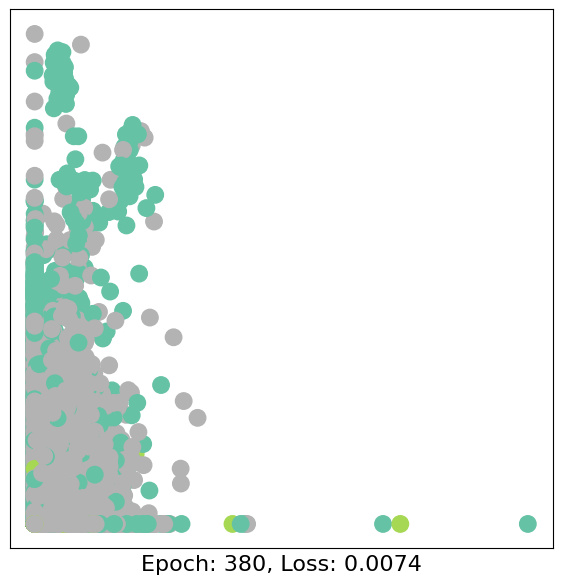

Epoch: 380, Loss: 0.0074, Train Licit Acc: 0.9992, Train Illicit Acc: 0.9948, Test Licit Acc: 0.9743, Test Illicit Acc: 0.3333


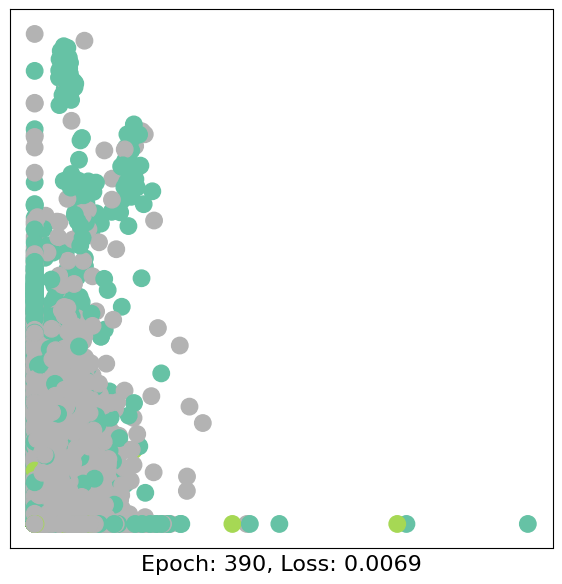

Epoch: 390, Loss: 0.0069, Train Licit Acc: 0.9992, Train Illicit Acc: 0.9954, Test Licit Acc: 0.9739, Test Illicit Acc: 0.3370


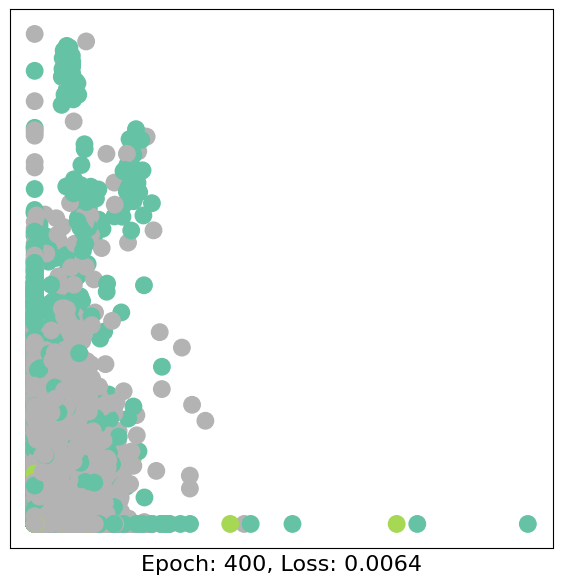

Epoch: 400, Loss: 0.0064, Train Licit Acc: 0.9993, Train Illicit Acc: 0.9954, Test Licit Acc: 0.9736, Test Illicit Acc: 0.3324
Final Train Licit Accuracy: 0.9993
Final Train Illicit Accuracy: 0.9954
Final Test Licit Accuracy: 0.9736
Final Test Illicit Accuracy: 0.3324


In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h


@torch.no_grad()
def test(data):
    model.eval()
    log_probs, h = model(data.x, data.edge_index)

    accs = {'train_mask': {'licit': 0, 'illicit': 0}, 'test_mask': {'licit': 0, 'illicit': 0}} # Dictionary to store thes accuracy of the results for licit and illicit transactions in both the training and testing modes.
    for mask_name in ['train_mask', 'test_mask']:
        mask = data[mask_name]  # access the mask from the data.
        pred = log_probs[mask].max(1)[1]  # Get the predicted labels.
        # Filter labels using the mask, then check for licit and illicit
        licit_mask = (data.y[mask] == 0)
        illicit_mask = (data.y[mask] == 1)
        licit_correct = pred[licit_mask].eq(data.y[mask][licit_mask]).sum().item() # Counting the number of correct predictions for licit transaction
        illicit_correct = pred[illicit_mask].eq(data.y[mask][illicit_mask]).sum().item() # Counting the number of correct predictions for illicit transaction
        accs[mask_name]['licit'] = licit_correct / licit_mask.sum().item() # Calculate the accuracy of licit transaction and store it
        accs[mask_name]['illicit'] = illicit_correct / illicit_mask.sum().item() # Calculate the accuracy of illicit transaction and store it

    return accs['train_mask'], accs['test_mask'] # Return the calculated accuracies for the training and testing sets.

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        train_acc, test_acc = test(data)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Licit Acc: {train_acc["licit"]:.4f}, Train Illicit Acc: {train_acc["illicit"]:.4f}, Test Licit Acc: {test_acc["licit"]:.4f}, Test Illicit Acc: {test_acc["illicit"]:.4f}')
        time.sleep(0.3)

train_acc, test_acc = test(data)
print(f'Final Train Licit Accuracy: {train_acc["licit"]:.4f}')
print(f'Final Train Illicit Accuracy: {train_acc["illicit"]:.4f}')
print(f'Final Test Licit Accuracy: {test_acc["licit"]:.4f}')
print(f'Final Test Illicit Accuracy: {test_acc["illicit"]:.4f}')


Saving the model

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/COSC3P99TrainingModels/model.pt')

Loading the model

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/COSC3P99TrainingModels/model.pt'))